# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

593

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:
#add api key to url
url = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID='+weather_api_key 

#create a list to store data
city_weather_check = []

#Start format for printing results
print("Begining Data Retrieval")
print("-----------------------------")

#Create a for loop to gather data on each city
for city in cities:
    city_weather_url = url + "&q=" + city

    try:
        response = requests.get(city_weather_url)
        response_json = response.json()
        city_weather_lat = response_json["coord"]["lat"]
        city_weather_lng = response_json["coord"]["lon"]
        city_weather_weather = response_json["main"]["temp"]
        city_weather_temp_max = response_json["main"]["temp_max"]
        city_weather_humidity = response_json["main"]["humidity"]
        city_weather_windspeed = response_json["wind"]["speed"]
        city_weather_cloudiness = response_json["clouds"]["all"]
        city_weather_country = response_json["sys"]["country"]
        city_weather_date = response_json["dt"]
        city_weather_check.append({"City": city,
                                 "Latitude":city_weather_lat,
                                 "Longitude":city_weather_lng,
                                 "City Weather":city_weather_weather,
                                  "Max Temp":city_weather_temp_max,
                                  "Humidity": city_weather_humidity,
                                  "Cloudiness": city_weather_cloudiness,
                                  "Windspeed": city_weather_windspeed,
                                  "Country": city_weather_country,
                                  "Date": city_weather_date})
        print(f"{city}, Processed")
    except:
        print(f"{city}, Not Found. Skipping...")
        pass
#finsih format for printing results   
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Begining Data Retrieval
-----------------------------
rocha, Processed
vao, Processed
ushuaia, Processed
jieshi, Processed
punta arenas, Processed
pontes e lacerda, Processed
clyde river, Processed
kodiak, Processed
rikitea, Processed
hithadhoo, Processed
puerto ayora, Processed
belushya guba, Not Found. Skipping...
albany, Processed
gigmoto, Processed
hilo, Processed
godalming, Processed
bluff, Processed
busselton, Processed
umzimvubu, Not Found. Skipping...
san felipe, Processed
atar, Processed
severo-kurilsk, Processed
hami, Processed
vestmannaeyjar, Processed
yellowknife, Processed
hobart, Processed
kremenchuk, Processed
khatanga, Processed
oranjemund, Processed
jamestown, Processed
bethel, Processed
upernavik, Processed
bredasdorp, Processed
butaritari, Processed
vaini, Processed
atuona, Processed
kibala, Processed
new norfolk, Processed
chokurdakh, Processed
wuzhou, Processed
lorengau, Processed
pevek, Processed
bad hofgastein, Processed
ponta do sol, Processed
faanui, Processed


ugoofaaru, Processed
turukhansk, Processed
bacuit, Not Found. Skipping...
saleaula, Not Found. Skipping...
mananara, Processed
jiangyou, Processed
karaton, Processed
mayo, Processed
esso, Processed
port hardy, Processed
miles city, Processed
phalaborwa, Processed
ribeira grande, Processed
turangi, Processed
muros, Processed
limulunga, Processed
pitimbu, Processed
kungurtug, Processed
karakol, Processed
tefe, Processed
kununurra, Processed
alta floresta, Processed
vaitupu, Not Found. Skipping...
westport, Processed
muriwai beach, Processed
khanpur, Processed
leshukonskoye, Processed
carutapera, Processed
thai nguyen, Processed
berlevag, Processed
mbekenyera, Processed
requena, Processed
alofi, Processed
krapivinskiy, Processed
guerrero negro, Processed
kudahuvadhoo, Processed
qujing, Processed
rio cuarto, Processed
bolitoc, Processed
gazli, Processed
miraflores, Processed
ambatolampy, Processed
noyabrsk, Processed
alta, Processed
mys shmidta, Not Found. Skipping...
knyaginino, Processed

In [4]:
#Check to make sure list was filled with data
city_weather_check

[{'City': 'rocha',
  'Latitude': -34.4833,
  'Longitude': -54.3333,
  'City Weather': 46.67,
  'Max Temp': 46.67,
  'Humidity': 68,
  'Cloudiness': 25,
  'Windspeed': 8.03,
  'Country': 'UY',
  'Date': 1660623206},
 {'City': 'vao',
  'Latitude': -22.6667,
  'Longitude': 167.4833,
  'City Weather': 72.23,
  'Max Temp': 72.23,
  'Humidity': 93,
  'Cloudiness': 100,
  'Windspeed': 26.98,
  'Country': 'NC',
  'Date': 1660623458},
 {'City': 'ushuaia',
  'Latitude': -54.8,
  'Longitude': -68.3,
  'City Weather': 37.06,
  'Max Temp': 37.06,
  'Humidity': 75,
  'Cloudiness': 40,
  'Windspeed': 5.75,
  'Country': 'AR',
  'Date': 1660623458},
 {'City': 'jieshi',
  'Latitude': 22.8134,
  'Longitude': 115.8257,
  'City Weather': 87.1,
  'Max Temp': 87.1,
  'Humidity': 66,
  'Cloudiness': 4,
  'Windspeed': 9.24,
  'Country': 'CN',
  'Date': 1660623459},
 {'City': 'punta arenas',
  'Latitude': -53.15,
  'Longitude': -70.9167,
  'City Weather': 35.71,
  'Max Temp': 35.71,
  'Humidity': 87,
  'Cloudin

In [5]:
#check to see if json was correct
response = requests.get(city_weather_url)
response_json = response.json()
response_json

{'coord': {'lon': -46.1189, 'lat': -20.9719},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 58.37,
  'feels_like': 56.12,
  'temp_min': 58.37,
  'temp_max': 58.37,
  'pressure': 1017,
  'humidity': 47,
  'sea_level': 1017,
  'grnd_level': 924},
 'visibility': 10000,
 'wind': {'speed': 3.51, 'deg': 354, 'gust': 5.19},
 'clouds': {'all': 0},
 'dt': 1660623637,
 'sys': {'country': 'BR', 'sunrise': 1660642002, 'sunset': 1660683067},
 'timezone': -10800,
 'id': 3466901,
 'name': 'Carmo do Rio Claro',
 'cod': 200}

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#create a new data frame for city weather data
city_weather_df = pd.DataFrame(city_weather_check)
city_weather_df

,City,Latitude,Longitude,City Weather,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
0,rocha,-34.4833,-54.3333,46.67,46.67,68,25,8.03,UY,1660623206
1,vao,-22.6667,167.4833,72.23,72.23,93,100,26.98,NC,1660623458
2,ushuaia,-54.8000,-68.3000,37.06,37.06,75,40,5.75,AR,1660623458
3,jieshi,22.8134,115.8257,87.10,87.10,66,4,9.24,CN,1660623459
4,punta arenas,-53.1500,-70.9167,35.71,35.71,87,40,10.36,CL,1660623287
...,...,...,...,...,...,...,...,...,...,...
548,saint albans,51.7500,-0.3333,63.27,66.90,83,100,3.44,GB,1660623635
549,yopal,5.3378,-72.3959,69.96,69.96,93,14,4.45,CO,1660623636
550,kyabe,9.4515,18.9449,69.12,69.12,99,100,3.38,TD,1660623636
551,mackenzie,55.2999,-123.1698,61.02,61.02,82,100,3.44,CA,1660623636


In [7]:
#Export data to a csv and locate it
city_weather_df.to_csv("../resources/city_weather_csv")

In [8]:
#Get data frame summary
city_weather_df.describe()

,Latitude,Longitude,City Weather,Max Temp,Humidity,Cloudiness,Windspeed,Date
count,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,5.530000e+02
mean,19.120875,18.187852,68.487396,68.984901,71.699819,53.770344,7.905461,1.660624e+09
std,33.488988,89.204059,13.420278,13.379869,20.668544,40.364010,5.586899,7.941659e+01
min,-54.800000,-175.200000,35.620000,35.620000,1.000000,0.000000,0.000000,1.660623e+09
25%,-8.759700,-59.335300,59.290000,59.790000,63.000000,12.000000,3.760000,1.660623e+09
50%,21.642200,20.227500,69.530000,69.890000,76.000000,54.000000,6.670000,1.660624e+09
75%,48.600000,93.450000,79.790000,80.240000,87.000000,99.000000,10.650000,1.660624e+09
max,78.218600,179.316700,97.110000,97.110000,100.000000,100.000000,35.300000,1.660624e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
#Reduce data frame to only include city with less than 100% humidity
clean_city_data = city_weather_df.loc[city_weather_df["Humidity"] <100]
clean_city_data

,City,Latitude,Longitude,City Weather,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
0,rocha,-34.4833,-54.3333,46.67,46.67,68,25,8.03,UY,1660623206
1,vao,-22.6667,167.4833,72.23,72.23,93,100,26.98,NC,1660623458
2,ushuaia,-54.8000,-68.3000,37.06,37.06,75,40,5.75,AR,1660623458
3,jieshi,22.8134,115.8257,87.10,87.10,66,4,9.24,CN,1660623459
4,punta arenas,-53.1500,-70.9167,35.71,35.71,87,40,10.36,CL,1660623287
...,...,...,...,...,...,...,...,...,...,...
548,saint albans,51.7500,-0.3333,63.27,66.90,83,100,3.44,GB,1660623635
549,yopal,5.3378,-72.3959,69.96,69.96,93,14,4.45,CO,1660623636
550,kyabe,9.4515,18.9449,69.12,69.12,99,100,3.38,TD,1660623636
551,mackenzie,55.2999,-123.1698,61.02,61.02,82,100,3.44,CA,1660623636


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

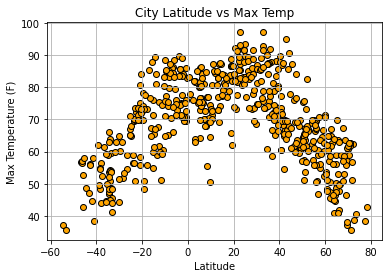

<Figure size 432x288 with 0 Axes>

In [10]:
#Create a plot for City Latitude vs Max Temp
temp_x = clean_city_data["Latitude"]
temp_y = clean_city_data["Max Temp"]
temp_colors = ["orange"]

temp_scatter = plt.scatter(temp_x,temp_y, c= temp_colors, edgecolors = "black")
plt.title("City Latitude vs Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.show()
plt.savefig("../resources/lat_vs_temp.png")

### The graph performs a parabola and shows as you move away from the equator the temperature drops significantly.

## Latitude vs. Humidity Plot

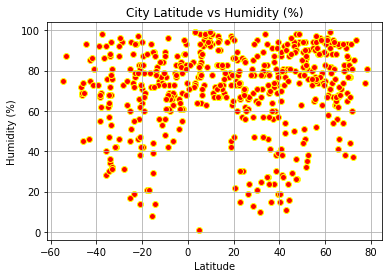

<Figure size 432x288 with 0 Axes>

In [11]:
#Create a plot for City Latitude vs Humidity
humidity_x = clean_city_data["Latitude"]
humidity_y = clean_city_data["Humidity"]
humidity_colors = ["red"]

humidity_scatter = plt.scatter(humidity_x, humidity_y, c= humidity_colors, edgecolors = "yellow")
plt.title("City Latitude vs Humidity (%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.show()
plt.savefig("../resources/lat_vs_humidity.png")

### Humidity looks to stay at relatively high percentage thoughout the longitudes dipping down a little bit in certian areas of latitude

## Latitude vs. Cloudiness Plot

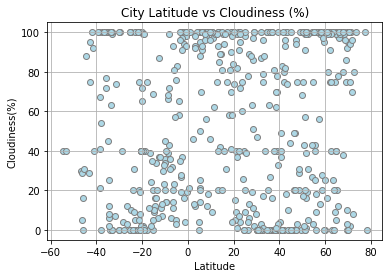

<Figure size 432x288 with 0 Axes>

In [12]:
#Create a plot for City Latitude vs Cloudiness
cloudiness_x = clean_city_data["Latitude"]
cloudiness_y = clean_city_data["Cloudiness"]
cloudiness_colors = ["lightblue"]

cloudiness_scatter = plt.scatter(cloudiness_x, cloudiness_y, c= cloudiness_colors, edgecolors = "grey")
plt.title("City Latitude vs Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid()
plt.show()
plt.savefig("../resources/lat_vs_cloudiness.png")

### There looks to be really little coralation with cloudiness percentage and it doesn't matter where you are for how cloudy it is

## Latitude vs. Wind Speed Plot

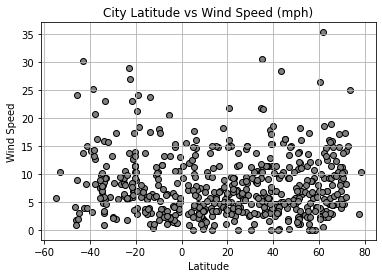

<Figure size 432x288 with 0 Axes>

In [13]:
#Create a plot for City Latitude vs Wind Speed
windspeed_x = clean_city_data["Latitude"]
windspeed_y = clean_city_data["Windspeed"]
windspeed_colors = ["grey"]

windspeed_scatter = plt.scatter(windspeed_x, windspeed_y, c= windspeed_colors, edgecolors = "black")
plt.title("City Latitude vs Wind Speed (mph)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()
plt.show()
plt.savefig("../resources/lat_vs_windspeed.png")

### Throughout the world it looks like windspeed will stay below 15 mph with a few exceptions here and there

## Linear Regression

In [14]:
#Separate the two hemispheres into their own data frame
northern_hemisphere_df = clean_city_data.loc[clean_city_data["Latitude"] >= 0]
southern_hemisphere_df = clean_city_data.loc[clean_city_data["Latitude"] <= 0]
southern_hemisphere_df

,City,Latitude,Longitude,City Weather,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
0,rocha,-34.4833,-54.3333,46.67,46.67,68,25,8.03,UY,1660623206
1,vao,-22.6667,167.4833,72.23,72.23,93,100,26.98,NC,1660623458
2,ushuaia,-54.8000,-68.3000,37.06,37.06,75,40,5.75,AR,1660623458
4,punta arenas,-53.1500,-70.9167,35.71,35.71,87,40,10.36,CL,1660623287
5,pontes e lacerda,-15.2261,-59.3353,75.97,75.97,44,20,3.29,BR,1660623459
...,...,...,...,...,...,...,...,...,...,...
539,nabire,-3.3667,135.4833,85.75,85.75,61,96,4.07,ID,1660623437
542,sola,-13.8833,167.5500,81.12,81.12,78,16,17.47,VU,1660623633
543,mareeba,-17.0000,145.4333,85.30,85.44,21,11,6.73,AU,1660623634
546,warrnambool,-38.3833,142.4833,54.66,54.66,68,21,14.23,AU,1660623635


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

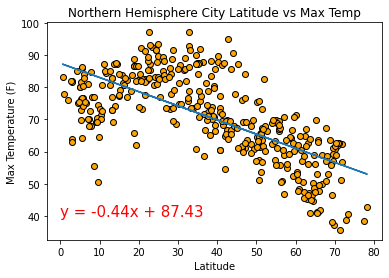

In [15]:
#Declare x and y values
north_temp_x_lr = northern_hemisphere_df["Latitude"]
north_temp_y_lr = northern_hemisphere_df["Max Temp"]
north_temp_lr_colors = ["orange"]

#Create scatter plot
north_temp_scatter = plt.scatter(north_temp_x_lr, north_temp_y_lr, c= north_temp_lr_colors, edgecolors = "black")
plt.title("Northern Hemisphere City Latitude vs Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")


# Formula for y= mx+b
#north_temp_formula = northern_hemisphere_df["Max Temp"] * north_temp_lr.slope + north_temp_lr.intercept
north_temp_lr = linregress(north_temp_x_lr,north_temp_y_lr)
line_eq = "y = " + str(round(north_temp_lr.slope,2)) + "x + " + str(round(north_temp_lr.intercept,2))
north_temp_slope = north_temp_lr.slope
b_north_temp = north_temp_lr.intercept
x_north_temp = north_temp_x_lr
north_temp_formula = x_north_temp * north_temp_slope + b_north_temp

#Plot linear regression
plt.annotate(line_eq,(0,40),fontsize=15,color="red")
plt.plot(x_north_temp, north_temp_formula)
plt.savefig("../resources/northern_lat_vs_temp.png")

### In the northern hemisphere the temperature goes down are you move up in latitude

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

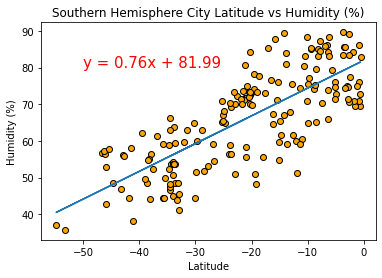

In [16]:
#Declare x and y values
south_temp_x_lr = southern_hemisphere_df["Latitude"]
south_temp_y_lr = southern_hemisphere_df["Max Temp"]
south_temp_lr_colors = ["orange"]

#Label the plot
south_temp_scatter = plt.scatter(south_temp_x_lr,south_temp_y_lr, c= south_temp_lr_colors, edgecolors = "black")
plt.title("Southern Hemisphere City Latitude vs Humidity (%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
south_temp_lr = linregress(south_temp_x_lr,south_temp_y_lr)

#Formula for y = mx + b
line_eq2 = "y = " + str(round(south_temp_lr.slope,2)) + "x + " + str(round(south_temp_lr.intercept,2))
south_temp_slope = south_temp_lr.slope
b_south_temp = south_temp_lr.intercept
x_south_temp = south_temp_x_lr
south_temp_formula = x_south_temp * south_temp_slope + b_south_temp

#Plot linear regression
plt.annotate(line_eq2,(-50,80),fontsize=15,color="red")
plt.plot(x_south_temp, south_temp_formula)
plt.savefig("../resources/southern_lat_vs_temp.png")

### As you move further down the southern hemishpere the temperature gets colder

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

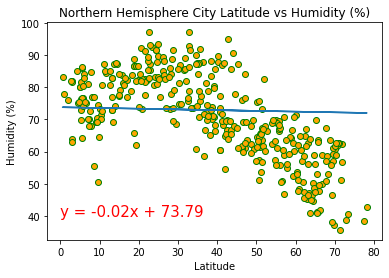

In [17]:
#Declare x and y values
north_humidity_x_lr = northern_hemisphere_df["Latitude"]
north_humidity_y_lr = northern_hemisphere_df["Humidity"]
north_humidity_lr_colors = ["orange"]

#Label the plot
north_humidity_scatter = plt.scatter(north_temp_x_lr, north_temp_y_lr, c= north_temp_lr_colors, edgecolors = "green")
plt.title("Northern Hemisphere City Latitude vs Humidity (%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

#Set up formula
linregress(north_humidity_x_lr,north_humidity_y_lr)

north_humidity_lr = linregress(north_humidity_x_lr,north_humidity_y_lr)
line_eq3 = "y = " + str(round(north_humidity_lr.slope,2)) + "x + " + str(round(north_humidity_lr.intercept,2))
north_humidity_slope = north_humidity_lr.slope
b_north_humidity = north_humidity_lr.intercept
x_north_humidity = north_humidity_x_lr
north_humidity_formula = x_north_humidity * north_humidity_slope + b_north_humidity

#Plot linear regression
plt.annotate(line_eq3,(0,40),fontsize=15,color="red")
plt.plot(x_north_humidity, north_humidity_formula)
plt.savefig("../resources/northern_lat_vs_humidity.png")

### As you move furthern north the humidity will start to go down

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

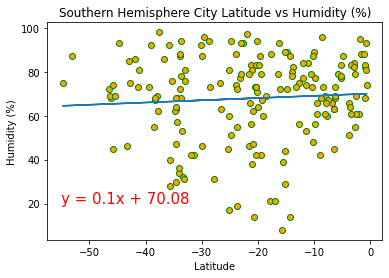

In [18]:
#Declare x and y values
south_humidity_x_lr = southern_hemisphere_df["Latitude"]
south_humidity_y_lr = southern_hemisphere_df["Humidity"]
south_humidity_lr_colors = ["orange"]

#Label the plot
south_humidity_scatter = plt.scatter(south_humidity_x_lr, south_humidity_y_lr, c= south_humidity_lr_colors, edgecolors = "green")
plt.title("Southern Hemisphere City Latitude vs Humidity (%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
south_humidity_lr = linregress(south_humidity_x_lr,south_humidity_y_lr)

#Formula for y = mx + b
line_eq4 = "y = " + str(round(south_humidity_lr.slope,2)) + "x + " + str(round(south_humidity_lr.intercept,2))
south_humidity_slope = south_humidity_lr.slope
b_south_humidity = south_humidity_lr.intercept
x_south_humidity = south_humidity_x_lr
south_humidity_formula = x_south_humidity * south_humidity_slope + b_south_humidity

#Plot linear regression
plt.annotate(line_eq4,(-55,20),fontsize=15,color="red")
plt.plot(x_south_humidity, south_humidity_formula)
plt.savefig("../resources/southern_lat_vs_humidity.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

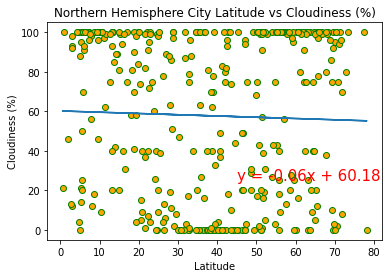

In [19]:
#Declare x and y values
north_cloudiness_x_lr = northern_hemisphere_df["Latitude"]
north_cloudiness_y_lr = northern_hemisphere_df["Cloudiness"]
north_cloudiness_lr_colors = ["orange"]

#Label the plot
north_cloudiness_scatter = plt.scatter(north_cloudiness_x_lr, north_cloudiness_y_lr, c= north_cloudiness_lr_colors, edgecolors = "green")
plt.title("Northern Hemisphere City Latitude vs Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
north_cloudiness_lr = linregress(north_cloudiness_x_lr,north_cloudiness_y_lr)

#Set up formula
line_eq5 = "y = " + str(round(north_cloudiness_lr.slope,2)) + "x + " + str(round(north_cloudiness_lr.intercept,2))
north_cloudiness_slope = north_cloudiness_lr.slope
b_north_cloudiness = north_cloudiness_lr.intercept
x_north_cloudiness = north_cloudiness_x_lr
north_cloudiness_formula = x_north_cloudiness * north_cloudiness_slope + b_north_cloudiness

#Plot linear regression
plt.annotate(line_eq5,(45,25),fontsize=15,color="red")
plt.plot(x_north_cloudiness, north_cloudiness_formula)
plt.savefig("../resources/northern_lat_vs_cloudiness.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

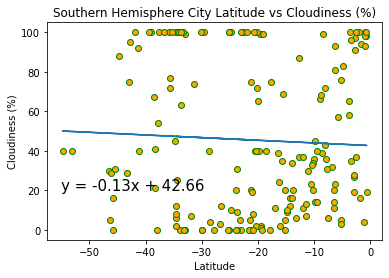

In [20]:
#Declare x and y values
south_cloudiness_x_lr = southern_hemisphere_df["Latitude"]
south_cloudiness_y_lr = southern_hemisphere_df["Cloudiness"]
south_cloudiness_lr_colors = ["orange"]

#Label the plot
south_cloudiness_scatter = plt.scatter(south_cloudiness_x_lr, south_cloudiness_y_lr, c= south_cloudiness_lr_colors, edgecolors = "green")
plt.title("Southern Hemisphere City Latitude vs Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
south_cloudiness_lr = linregress(south_cloudiness_x_lr, south_cloudiness_y_lr)

#Set up formula
line_eq6 = "y = " + str(round(south_cloudiness_lr.slope,2)) + "x + " + str(round(south_cloudiness_lr.intercept,2))
south_cloudiness_slope = south_cloudiness_lr.slope
b_south_cloudiness = south_cloudiness_lr.intercept
x_south_cloudiness = south_cloudiness_x_lr
south_cloudiness_formula = x_south_cloudiness * south_cloudiness_slope + b_south_cloudiness

#Plot linear regression
plt.annotate(line_eq6,(-55,20),fontsize=15,color="black")
plt.plot(x_south_cloudiness, south_cloudiness_formula)
plt.savefig("../resources/southern_lat_vs_cloudiness.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

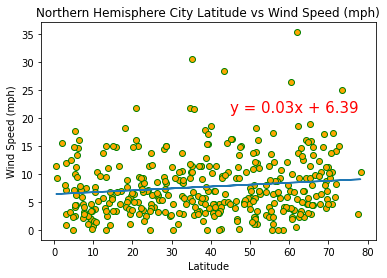

In [21]:
#Declare x and y values
north_windspeed_x_lr = northern_hemisphere_df["Latitude"]
north_windspeed_y_lr = northern_hemisphere_df["Windspeed"]
north_windspeed_lr_colors = ["orange"]

#Label plot
north_windspeed_scatter = plt.scatter(north_windspeed_x_lr, north_windspeed_y_lr, c= north_windspeed_lr_colors, edgecolors = "green")
plt.title("Northern Hemisphere City Latitude vs Wind Speed (mph)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
north_windspeed_lr = linregress(north_windspeed_x_lr,north_windspeed_y_lr)

#Set up formula
line_eq7 = "y = " + str(round(north_windspeed_lr.slope,2)) + "x + " + str(round(north_windspeed_lr.intercept,2))
north_windspeed_slope = north_windspeed_lr.slope
b_north_windspeed = north_windspeed_lr.intercept
x_north_windspeed = north_windspeed_x_lr
north_windspeed_formula = x_north_windspeed * north_windspeed_slope + b_north_windspeed

#Plot linear regression
plt.annotate(line_eq7,(45,21),fontsize=15,color="red")
plt.plot(x_north_windspeed, north_windspeed_formula)
plt.savefig("../resources/northern_lat_vs_windspeed.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

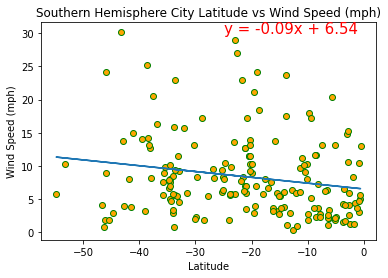

In [22]:
#Declare x and y values
south_windspeed_x_lr = southern_hemisphere_df["Latitude"]
south_windspeed_y_lr = southern_hemisphere_df["Windspeed"]
south_windspeed_lr_colors = ["orange"]

#Label plot
south_cloudiness_scatter = plt.scatter(south_windspeed_x_lr, south_windspeed_y_lr, c= south_windspeed_lr_colors, edgecolors = "green")
plt.title("Southern Hemisphere City Latitude vs Wind Speed (mph)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

#Set up formula
south_windspeed_lr = linregress(south_windspeed_x_lr,south_windspeed_y_lr)
line_eq8 = "y = " + str(round(south_windspeed_lr.slope,2)) + "x + " + str(round(south_windspeed_lr.intercept,2))
south_windspeed_slope = south_windspeed_lr.slope
b_south_windspeed = south_windspeed_lr.intercept
x_south_windspeed = south_windspeed_x_lr
south_windspeed_formula = x_south_windspeed * south_windspeed_slope + b_south_windspeed

#Plot linear regression
plt.annotate(line_eq8,(-25,30),fontsize=15,color="red")
plt.plot(x_south_windspeed, south_windspeed_formula)
plt.savefig("../resources/southern_lat_vs_windspeed.png")